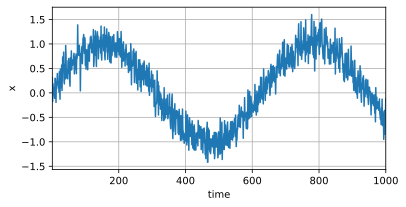

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

T = 1000  # 总共产生1000个点
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [9]:
time.shape, x.shape

(torch.Size([1000]), torch.Size([1000]))

In [10]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i: T - tau + i]
labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
# 只有前n_train个样本用于训练
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

In [14]:
x[:10], features[0:4]

(tensor([ 0.3152, -0.1725,  0.1861,  0.0135,  0.0355,  0.1127, -0.0515, -0.1118,
          0.2943,  0.2975]),
 tensor([[ 0.3152, -0.1725,  0.1861,  0.0135],
         [-0.1725,  0.1861,  0.0135,  0.0355],
         [ 0.1861,  0.0135,  0.0355,  0.1127],
         [ 0.0135,  0.0355,  0.1127, -0.0515]]))